In [181]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_catchment_distribution(district):
    distributions = ["baseline_grouped", "120Hurst_grouped"]
    fig, axs = plt.subplots(1, 2, figsize=(24, 6))  # Create a figure with 2 subplots side by side
    means = []  # List to store the means of the two distributions
    all = []
    for idx, distribution in enumerate(distributions):
        dist = []
        for i in range(100):
            path = os.path.join(distribution, f'trace{i}', f'{district}.txt')
            if os.path.exists(path):
                with open(os.path.join(path), 'r') as f:
                    lines = f.readlines()
                    data = [float(line.strip()) for line in lines[-12:]]
                    dist.append(data)
                    
        # Plot each time series
        for data in dist:
            axs[idx].plot(data, alpha=0.3)  # Use alpha for transparency
        all.append(dist)
        
        mean_series = np.mean(dist, axis=0)
        median_series = np.median(dist, axis=0)
        std_series = np.std(dist, axis=0)
        var_series = np.var(dist, axis=0)
        min_series = np.min(dist, axis=0)
        max_series = np.max(dist, axis=0)
        q1_series = np.percentile(dist, 25, axis=0)
        q3_series = np.percentile(dist, 75, axis=0)
        axs[idx].plot(mean_series, color='red', linewidth=4, label='Mean')
        print(all[0])
        means.append(std_series)
        
        # Print statistical data
        # print(f"Statistics for {distribution}:")
        # print(f"Mean: {mean_series}")
        # print(f"Median: {median_series}")
        # print(f"Standard Deviation: {std_series}")
        # print(f"Variance: {var_series}")
        # print(f"Minimum: {min_series}")
        # print(f"Maximum: {max_series}")
        # print(f"1st Quartile: {q1_series}")
        # print(f"3rd Quartile: {q3_series}")
        
        # Add labels and title
        axs[idx].set_xlabel('Month')
        axs[idx].set_ylabel('Inflow')
        axs[idx].set_title(f'{distribution} - 100 Time Series {district}')
        axs[idx].grid(True)
        axs[idx].set_xticks(range(12))
        # axs[idx].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        
    all_values = [value for dist in all for series in dist for value in series]
    min_value = min(all_values)
    max_value = max(all_values)
    for ax in axs:
        ax.set_ylim(min_value, max_value)
        
    plot_mean_comparison(means, distributions, district)
    
    plt.tight_layout()
    
def plot_mean_comparison(means, distributions, district):
    fig, ax = plt.subplots(figsize=(12, 6))  # Create a separate figure for mean comparison

    # Plot the means of both distributions
    for idx, mean_series in enumerate(means):
        ax.plot(mean_series, label=f'Mean of {distributions[idx]}')

    # Add labels and title
    ax.set_xlabel('Month')
    ax.set_ylabel('Value')
    ax.set_title(f'Mean Comparison - {district}')
    ax.grid(True)
    ax.set_xticks(range(12))
    # ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.legend()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

[[501.9133744026286, 281.66098864994024, 135.7879355958781, 120.32192783004778, 158.11130861708483, 495.1828046594981, 534.7088896356034, 1699.0171049880526, 5055.7536477001195, 3552.4313956093197, 2374.3292600059744, 640.7640109767024, 400.2536376194742, 219.42823402031058, 200.30039762544806, 113.14028938918759, 157.7894389560932, 252.13212589605718, 941.3961618876941, 3111.6688321385914, 7927.663172043013, 4320.169638590201, 2090.071777927121, 535.5239381720431, 611.3400227747908, 213.55878994922347, 205.40220654121865, 118.7586320564516, 112.43787612007169, 192.08902329749097, 502.41728046594983, 2646.7827060931904, 4633.157851702507, 4319.031866039429, 1492.6484318996415, 551.1556257467146, 189.51071497909203, 240.75857265531653, 136.0252561230585, 139.0194592293907, 88.35850914725208, 151.92276881720437, 148.64283751493434, 1610.574899193548, 3551.9681339605736, 4057.957187126642, 737.2903856780166, 979.8643361708481, 450.3251780913978, 190.11067988351257, 180.94599275686977, 114

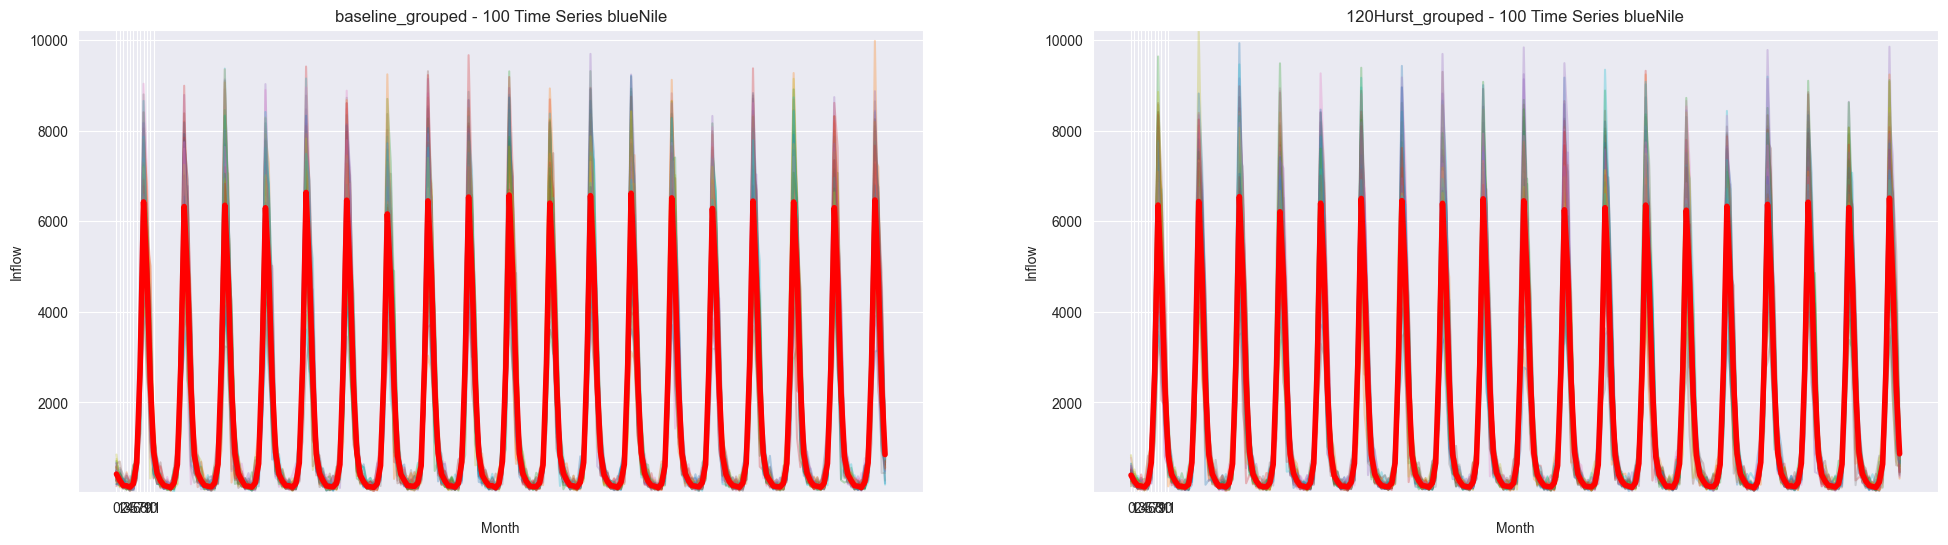

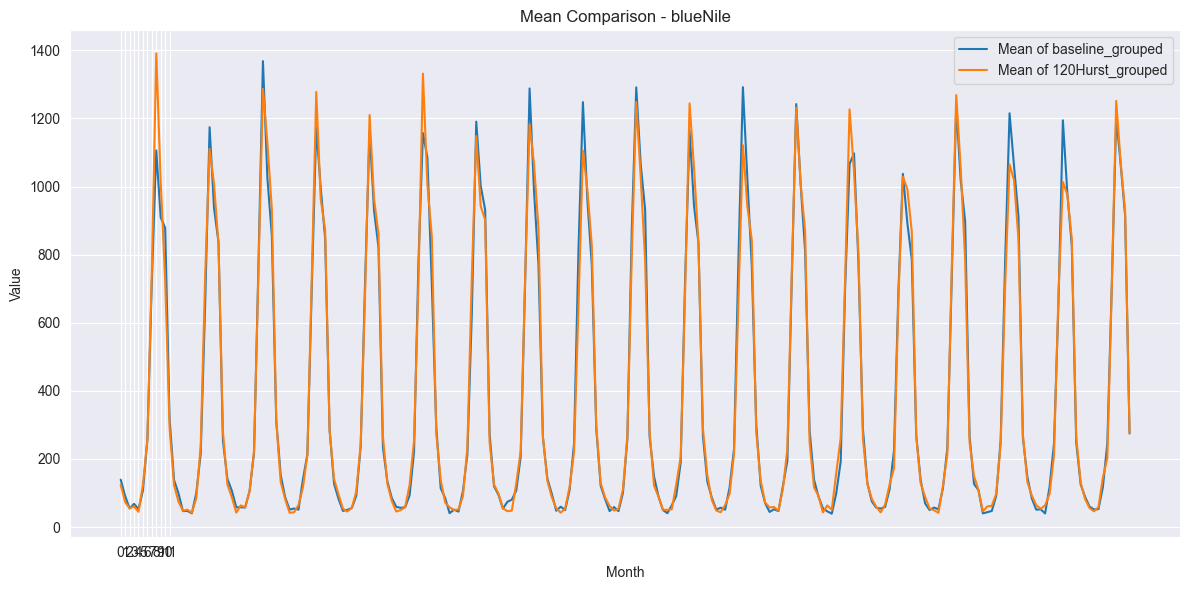

<Figure size 640x480 with 0 Axes>

In [182]:
plot_catchment_distribution("blueNile")

In [180]:
distributions = ["baseline_grouped", "120Hurst_grouped"]
districts = ["atbara", "blueNile", "dinder", "gerdToRoseires", "rahad", "roseiresToAbuNaama", "sukiToSennar", "whiteNile"]
for district in districts:
    means = []  # List to store the means of the two distributions
    all = []
    for idx, distribution in enumerate(distributions):
        dist = []
        for i in range(100):
            path = os.path.join(distribution, f'trace{i}', f'{district}.txt')
            if os.path.exists(path):
                with open(os.path.join(path), 'r') as f:
                    lines = f.readlines()
                    data = [float(line.strip()) for line in lines]
                    dist.append(data)
        all.append(dist)
       
    all = np.array(all)
    print(all.shape)
    
    df_baseline = pd.DataFrame(all[0], columns=[f'Month-{i+1}' for i in range(240)])
    df_hurst = pd.DataFrame(all[1], columns=[f'Month-{i+1}' for i in range(240)])  # Example Hurst data
    
    df_baseline_annual = df_baseline.groupby(np.arange(len(df_baseline.columns)) // 12, axis=1).mean()
    df_hurst_annual = df_hurst.groupby(np.arange(len(df_hurst.columns)) // 12, axis=1).mean()
    
    # Create annual boxplots with different colors
    years = np.arange(1, len(df_baseline_annual) + 1)
    
    plt.figure(figsize=(14, 6))
    
    # Boxplot for Baseline dataset
    # plt.boxplot(df_baseline_annual.values.T, positions=years, widths=0.6, patch_artist=True, showfliers=False,
    #             boxprops=dict(facecolor='lightblue', color='blue'), whiskerprops=dict(color='blue'), capprops=dict(color='blue'),
    #             medianprops=dict(color='blue'))
    # 
    # # Boxplot for Hurst dataset
    # plt.boxplot(df_hurst_annual.values.T, positions=years + 0.5, widths=0.6, patch_artist=True, showfliers=False,
    #             boxprops=dict(facecolor='lightgreen', color='green'), whiskerprops=dict(color='green'), capprops=dict(color='green'),
    #             medianprops=dict(color='green'))
    
    # Plotting means as lines
    mean_baseline = df_baseline_annual.std(axis=1)
    mean_hurst = df_hurst_annual.std(axis=1)
    print(district)
    print("difference mean:" + str((mean_hurst.mean() - mean_baseline.mean()) * 100/mean_baseline.mean()))
    print("difference std:" + str((mean_hurst.std() - mean_baseline.std()) * 100/mean_baseline.std()))
    
    # plt.plot(mean_baseline, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8, label='Mean Baseline')
    # plt.plot(mean_hurst, marker='o', color='green', linestyle='-', linewidth=2, markersize=8, label='Mean Hurst')
    # 
    # plt.xticks(years, [f'Year {year}' for year in years], rotation=45)
    # plt.xlabel('Year')
    # plt.ylabel('Flow Rate')
    # plt.title('Annual Boxplots: Baseline vs. Hurst')
    # plt.legend(['Baseline', 'Hurst'], loc='upper right')
    # plt.grid(True)
    # plt.tight_layout()
    # plt.show()

(2, 100, 240)
atbara
difference mean:0.01568529736360471
difference std:7.581845832716833
(2, 100, 240)
blueNile
difference mean:-1.6653760948139762
difference std:11.34410301540377
(2, 100, 240)
dinder
difference mean:-4.143914872405818
difference std:12.66211581734457
(2, 100, 240)
gerdToRoseires
difference mean:-3.5609298526397257
difference std:31.148011134760218
(2, 100, 240)
rahad
difference mean:-3.6266351690016503
difference std:0.9549653890286864
(2, 100, 240)
roseiresToAbuNaama
difference mean:0.0
difference std:0.0
(2, 100, 240)
sukiToSennar
difference mean:-0.2566946544220215
difference std:5.480459835486883
(2, 100, 240)
whiteNile
difference mean:8.122490142420451
difference std:2.6255192810454444


<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

In [190]:
distributions = ["baseline_grouped"]
districts = [ "roseiresToAbuNaama", "atbara", "blueNile", "dinder", "gerdToRoseires", "rahad", "sukiToSennar", "whiteNile"]
all_others = []
roseires = 0
for district in districts:
    means = []  # List to store the means of the two distributions
    all = []
    for idx, distribution in enumerate(distributions):
        dist = []
        for i in range(100):
            path = os.path.join(distribution, f'trace{i}', f'{district}.txt')
            if os.path.exists(path):
                with open(os.path.join(path), 'r') as f:
                    lines = f.readlines()
                    data = [float(line.strip()) for line in lines]
                    dist.append(data)
        all.append(dist)
       
    all = np.array(all)
    
    if district == "roseiresToAbuNaama":
        roseires = sum(sum(sum(all)))
    else:
        all_others.append(sum(sum(sum(all))))

print(roseires)
print(all_others)
print(roseires / sum(all_others))

197654.6445639187
[7856653.328667508, 38652554.109490156, 2237012.6698290557, 1513955.222861036, 810375.084814442, 932283.3809402754, 48924382.52744813]
0.0019583879528521017


9